# Diagnostic Plots


## Standard Diagnostic Plots

### Residual vs Fitted Plot

### Q-Q Normal Plot
The logic of examining the whole distribution of errors is that they were assumed i.i.d. Unfortunately, we know this is not true of the errors. So, the shape of the residual distribution is still normal, but the variance differs due to leverage. Because of this, the logic of collapsing the residuals together to assess the full distribution somewhat falls apart.

There are two choices here, the default method and the more correct method.

As an alternative, we could *studentise* the residuals and check against a student-t with $n-p-1$ degrees of freedom


In [33]:
options(repr.plot.width=14, repr.plot.height=9)

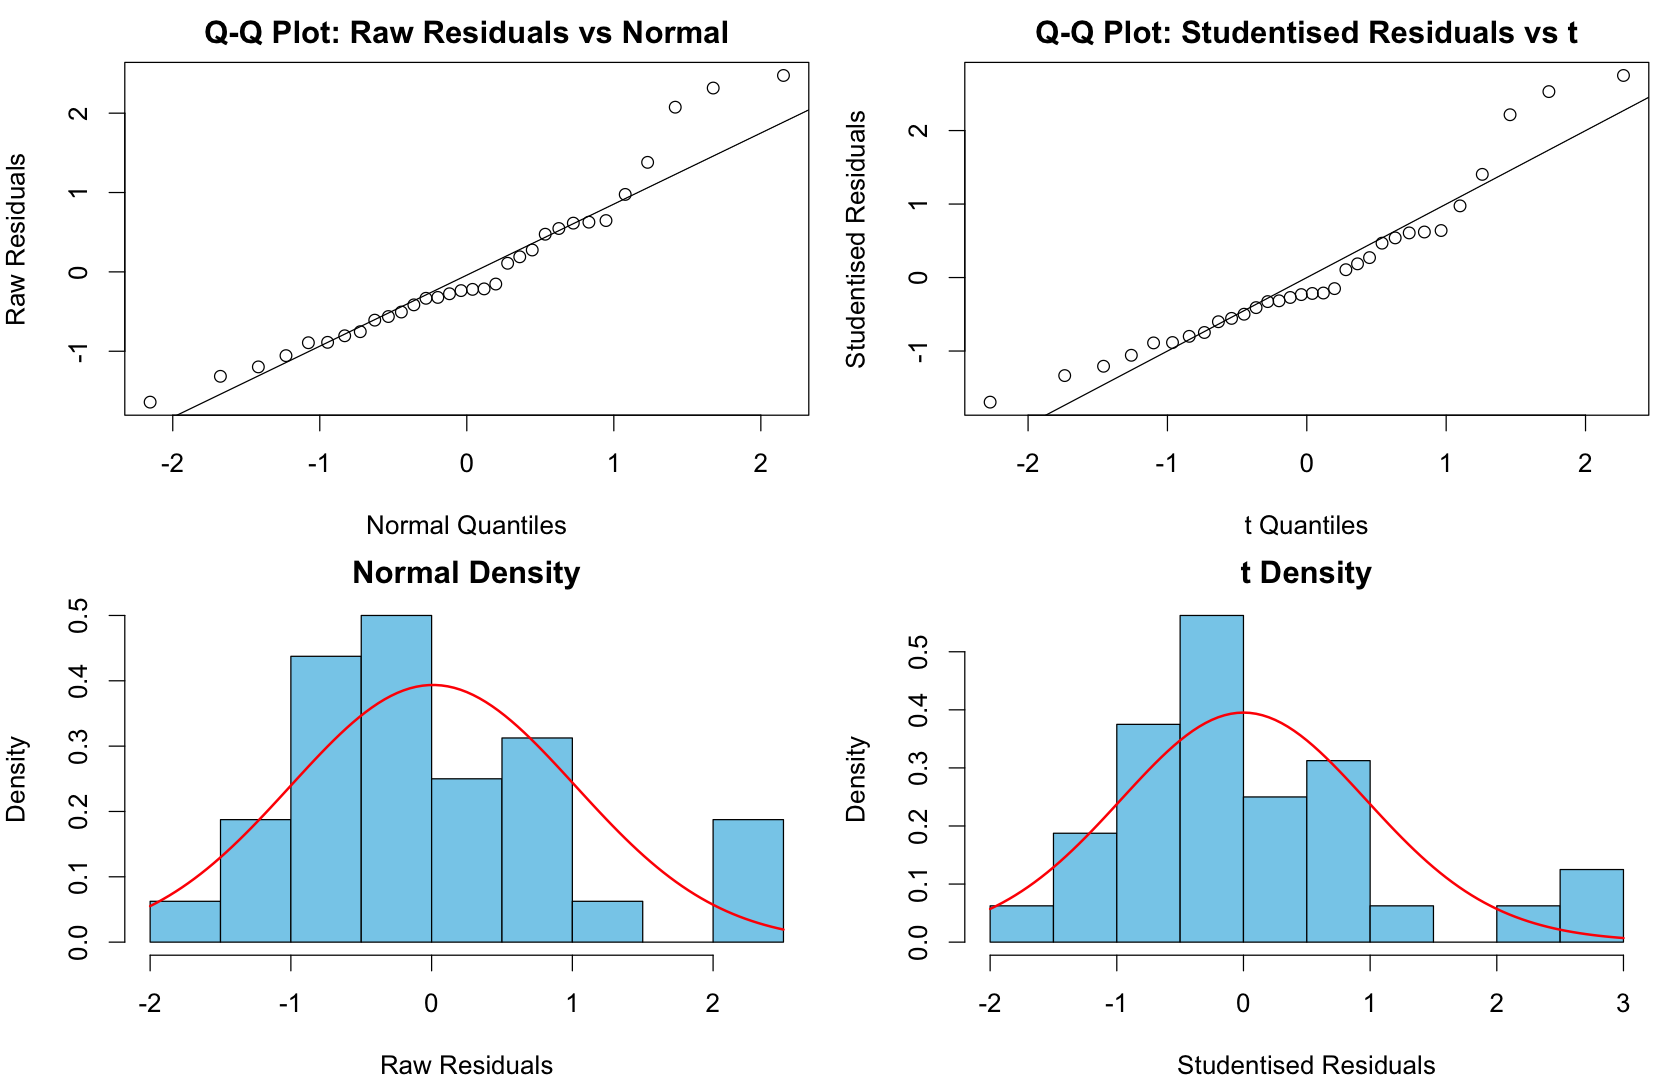

In [36]:
# Fit the model
model <- lm(mpg ~ wt + hp + cyl, data = mtcars)

# Extract residuals
resid.raw <- rstandard(model)
resid.t   <- rstudent(model) 

# Degrees of freedom
n  <- length(resid(model))
p  <- length(coef(model))
df <- n - p - 1

# Set up 2x2 plot grid
par(mfrow=c(2,2), mar=c(4,4,2,1))
par(cex=1.3) # plot scaling

# --- 1) Q-Q plot: Normal quantiles vs standard residuals ---
qqnorm(resid.raw,
       main = "Q-Q Plot: Raw Residuals vs Normal",
       xlab = "Normal Quantiles",
       ylab = "Raw Residuals")
qqline(resid.raw)

# --- 2) Q-Q plot: t quantiles vs studentised residuals ---
qqplot(qt(ppoints(n), df = df), resid.t,
       main = "Q-Q Plot: Studentised Residuals vs t",
       xlab = "t Quantiles",
       ylab = "Studentised Residuals")
abline(0,1)

# --- 3) Histogram + Normal density: Standard residuals ---
hist(std_resid, breaks=10, probability=TRUE,
     main = "Normal Density",
     xlab = "Raw Residuals", col = "skyblue")
curve(dnorm(x, mean=mean(resid.raw), sd=sd(resid.raw)),
      col="red", lwd=2, add=TRUE)

# --- 4) Histogram + t density: Studentised residuals ---
hist(stud_resid, breaks = 10, probability = TRUE,
     main = "t Density",
     xlab = "Studentised Residuals", col = "skyblue")
curve(dt(x, df = df), col = "red", lwd = 2, add = TRUE)


As we can see, in this example, there is not a huge amount between these. This is one of the reasons why the standard (but slightly incorrect) default method is often *good enough*.



### Scale vs Location Plot

### Residuals vs Leverage Plot
Cook's distance...

`````{admonition} Residuals are Not Independent with Constant Variance
:class: tip
One of the main reasons for distinguishing between *errors* and *residuals* is that the estimation process *changes* the distributional properties of the errors. This means that *errors* and *residuals* are not expected to behave idnetically. So while it is correct to assume

$$
\epsilon_{i} \overset{\text{i.i.d.}}{\sim} \mathcal{N}\left(0,\sigma^{2}\right),
$$

it is *not* technically correct to assume the same for the *errors*. This is because the estimation procedure can *induce* correlation between the errors and the errors can have non-constant variance, depending upon a property known as *leverage*. We will discuss some of these concepts next week. For now, just note that the residuals can be used as an *approximation* for the errors, but we need to perform some additional checks to make sure that this approximation is reasonable.
`````

[^VIF-foot]: Note that some authors suggest VIF > 10 to be the marker for concerning multicollinearity. Here, we would recommend the more cautious approach of using VIF > 5.

[^NASA-foot]: [Faraway (2005)](https://www.utstat.toronto.edu/~brunner/books/LinearModelsWithR.pdf) provides a real-world example of why this is *not* good practise. This concerns the delay in the discovery of the hole in the Ozone layer due to NASA's automatic data analysis algorithms discarding very low readings assumed to be mistakes.